In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

#plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [2]:
import os
import pandas as pd
import io

try:
    from google.colab import files
    print("Running in Colab. Please upload 'final_data_features.csv'...")
    uploaded = files.upload()

    filename = next(iter(uploaded))
    print(f"Loaded from upload: {filename}")

except ImportError:

    print("Running locally...")

    possible_paths = [
        'final_data_features.csv',
        '../data/final_data_features.csv',
        'data/final_data_features.csv'
    ]

    filename = None
    for path in possible_paths:
        if os.path.exists(path):
            filename = path
            break

    if filename:
        print(f"Found file locally: {filename}")
    else:
        raise FileNotFoundError("Could not find 'final_data_features.csv'. Please place it in the notebook folder.")

Running in Colab. Please upload 'final_data_features.csv'...


Saving final_data_features.csv to final_data_features (4).csv
Loaded from upload: final_data_features (4).csv


In [3]:
df = pd.read_csv(filename)

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nFirst 5 Rows:")
display(df.head())

audio_cols = [c for c in df.columns if c.startswith('mfcc_')]
lyric_cols = [c for c in df.columns if c.startswith('tfidf_')]
metadata_cols = [c for c in df.columns if c not in audio_cols + lyric_cols]

print(f"\nFeature Breakdown:")
print(f"Audio Features: {len(audio_cols)}")
print(f"Lyric Features: {len(lyric_cols)}")
print(f"Metadata Columns: {metadata_cols}")

Dataset Shape: (5986, 67)

Missing Values:
 0

First 5 Rows:


,id,genre,audio_path,lyric_path,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,tfidf_se,tfidf_si,tfidf_te,tfidf_time,tfidf_tu,tfidf_une,tfidf_ve,tfidf_want,tfidf_yeah,tfidf_ça
0,1001890,ambient,data/audio/1001890.mp3,data/lyrics/1001890.txt,-172.53186,144.02585,-35.479717,14.106104,19.311249,-3.682629,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,1001891,ambient,data/audio/1001891.mp3,data/lyrics/1001891.txt,-218.08649,135.89520,13.833035,26.087866,10.417722,16.851640,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.460921,0.0,0.0,0.0
2,1002753,pop,data/audio/1002753.mp3,data/lyrics/1002753.txt,-156.04802,98.00602,3.610792,51.717052,-10.133570,-1.389707,...,0.0,0.0,0.0,0.0,0.158817,0.0,0.000000,0.0,0.0,0.0
3,1003648,alternative,data/audio/1003648.mp3,data/lyrics/1003648.txt,-337.14780,149.42995,-16.812240,-9.276005,-12.294240,-24.927448,...,0.0,0.0,0.0,0.0,0.187856,0.0,0.000000,0.0,0.0,0.0
4,1003654,alternative,data/audio/1003654.mp3,data/lyrics/1003654.txt,-374.50943,148.66824,45.411797,10.471763,16.143208,7.315037,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0



Feature Breakdown:
Audio Features: 13
Lyric Features: 50
Metadata Columns: ['id', 'genre', 'audio_path', 'lyric_path']


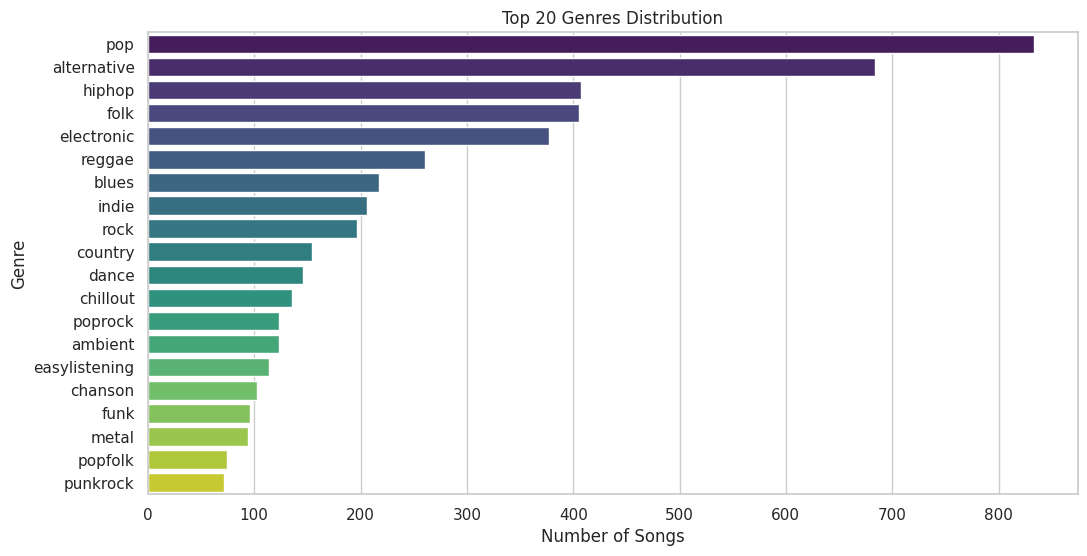

In [4]:
# Genre Counts (Top 20)
if 'genre' in df.columns:
    plt.figure(figsize=(12, 6))
    top_genres = df['genre'].value_counts().head(20)

    sns.barplot(
        x=top_genres.values,
        y=top_genres.index,
        hue=top_genres.index,
        palette="viridis",
        legend=False
    )

    plt.title("Top 20 Genres Distribution")
    plt.xlabel("Number of Songs")
    plt.ylabel("Genre")
    plt.show()
else:
    print("No 'genre' column found in dataset.")

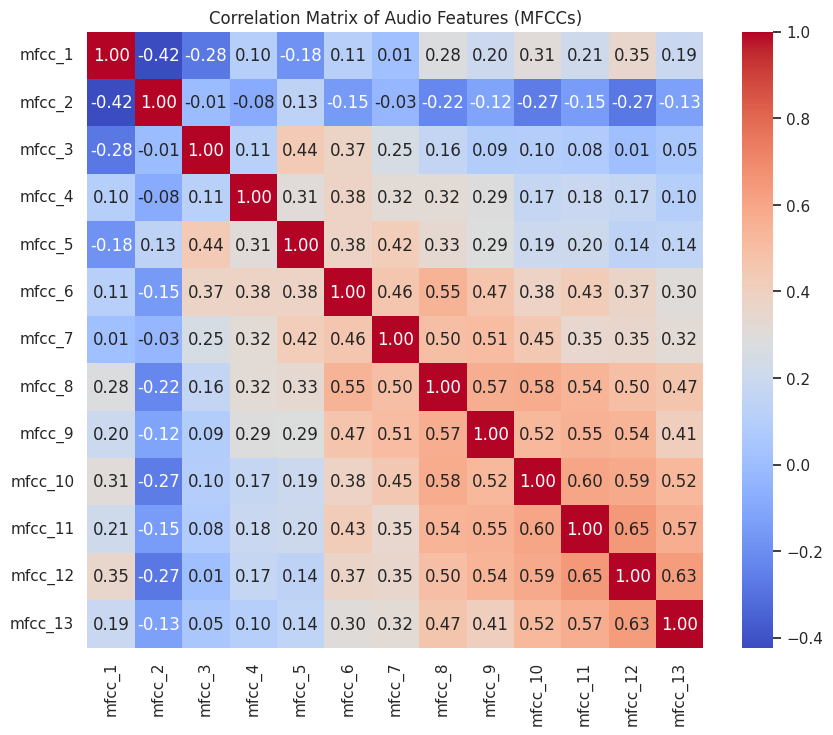

In [5]:
# Correlation Heatmap of Audio Features
if len(audio_cols) > 0:
    plt.figure(figsize=(10, 8))
    corr_matrix = df[audio_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Matrix of Audio Features (MFCCs)")
    plt.show()

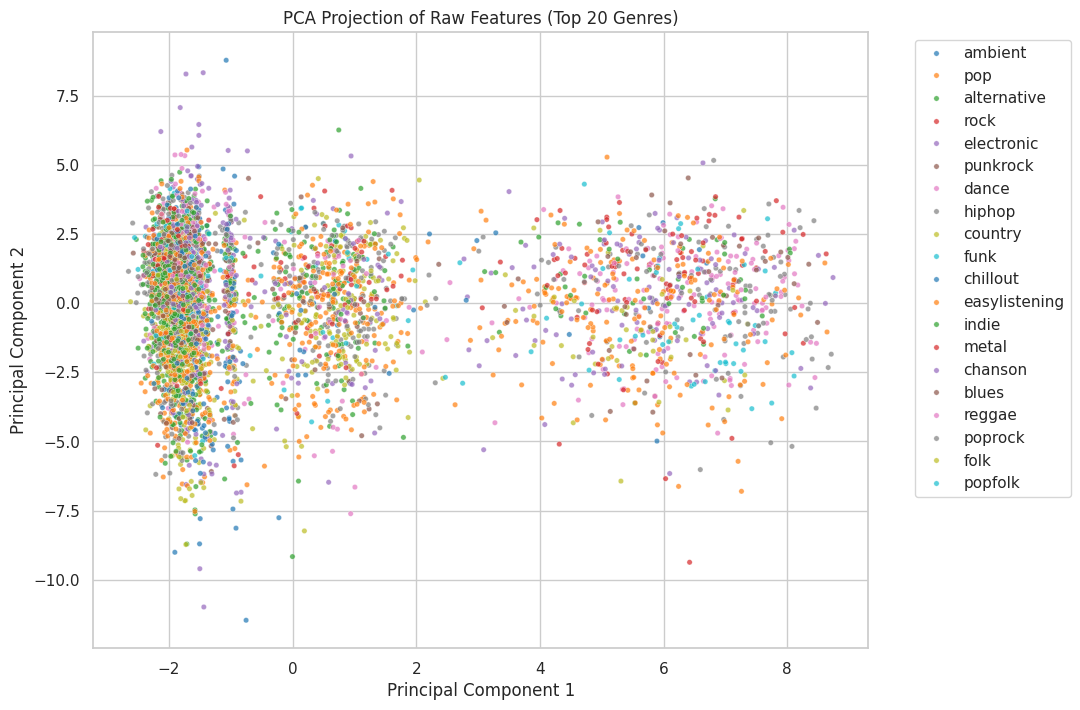

In [6]:
features = df[audio_cols + lyric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

# Color by Genre
if 'genre' in df.columns:
    # Using only top 10 genres
    top_10 = df['genre'].value_counts().head(20).index
    mask = df['genre'].isin(top_10)
    sns.scatterplot(x=X_pca[mask, 0], y=X_pca[mask, 1], hue=df.loc[mask, 'genre'], palette="tab10", s=15, alpha=0.7)
    plt.title("PCA Projection of Raw Features (Top 20 Genres)")
else:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.title("PCA Projection of Raw Features")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()